In [387]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score




In [388]:
x = 6 * np.random.rand(200,1)-3
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(200,1)
x.shape,y.shape

((200, 1), (200, 1))

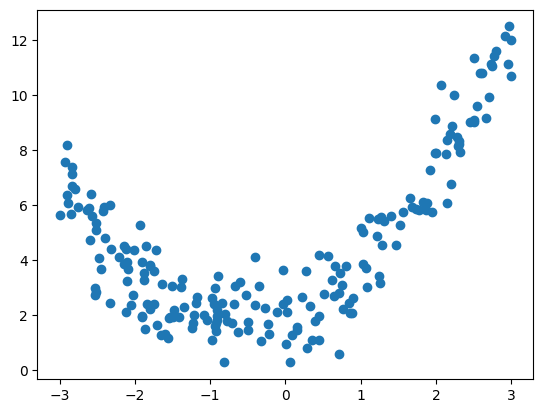

In [389]:
plt.scatter(x,y)

In [390]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [391]:
from sklearn.linear_model import LinearRegression

In [392]:
lr = LinearRegression()

In [393]:
lr.fit(x_train,y_train)

LinearRegression()

In [394]:
y_pred = lr.predict(x_test)

In [395]:
r2_score(y_test,y_pred)

0.2055768825262223

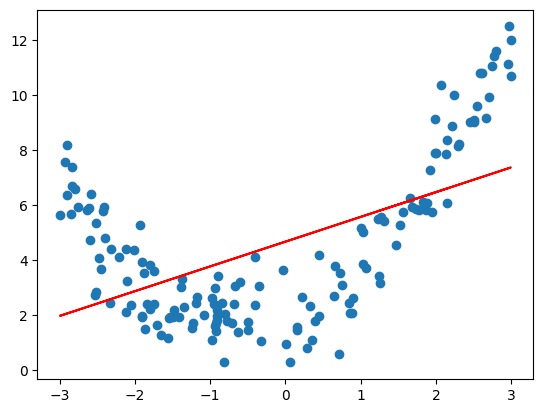

In [396]:
plt.plot(x_train,lr.predict(x_train),color='red')
plt.scatter(x_train,y_train)

In [397]:
poly = PolynomialFeatures(degree=2)

In [398]:
x_train_trans= poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [399]:
x_test[0]

array([-2.52229773])

In [400]:
x_test_trans[0]

array([ 1.        , -2.52229773,  6.36198582])

In [401]:
lr2 = LinearRegression()

In [402]:
lr2.fit(x_train_trans,y_train)

LinearRegression()

In [403]:
y_pred = lr2.predict(x_test_trans)

In [404]:
r2_score(y_test,y_pred)

0.8947706772530979

In [405]:
x_new = np.linspace(x_train.min(),x_train.max(), x_train.shape[0])
x_new_trans = poly.transform(x_new.reshape(-1,1))
y_new = lr2.predict(x_new_trans)

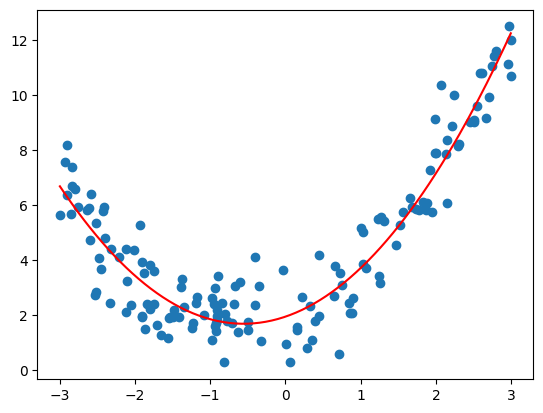

In [406]:
plt.plot(x_new,y_new,color='red')
plt.scatter(x_train,y_train)

In [407]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def polynomial_regression(degree,x_train,y_train):


    poly_features = PolynomialFeatures(degree=degree)

    
    x_train_trans = poly_features.fit_transform(x_train)

    x_new=np.linspace(x_train.min(), x_train.max(), x_train.shape[0])
    x_new_poly = poly_features.transform(x_new.reshape(-1, 1))



    lr = LinearRegression()
    lr.fit(x_train_trans,y_train)
    y_new = lr.predict(x_new_poly)

    plt.scatter(x_train, y_train, )

    plt.plot(x_new,y_new,color='red')

    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

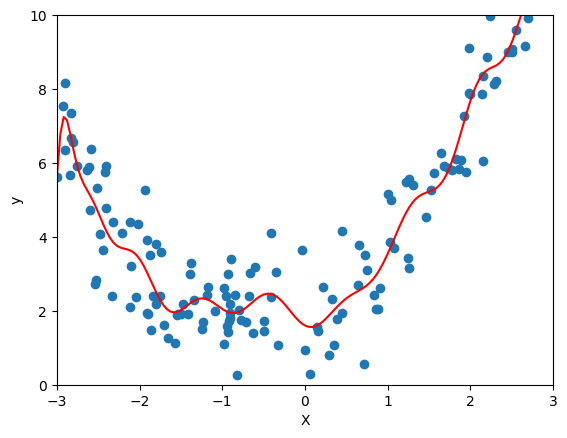

In [408]:
polynomial_regression(22,x_train,y_train)

In [409]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [410]:
import plotly.express as px
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [411]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [412]:
import plotly.graph_objects as go

df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [413]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape


(100, 2)

In [414]:
poly = PolynomialFeatures(degree=5)
X_multi_trans = poly.fit_transform(X_multi)

In [415]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [416]:
X_test_multi = poly.transform(final)


In [417]:
z_final = lr.predict(X_multi_trans).reshape(10,10)


In [418]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()